<h1>Exploratory Data Analysis of Renthop rental listing data</h1>

<h3>The renthop competition on Kaggle explores the rental listings data with the intention of determining the interest level of a certain apartment either low, medium or high.</h3>

In [1]:
#begin with standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#helper functions for visualization
def plot_correlation_map(df):
    """Plots a correlation map given a dataframe"""
    corr=df.corr()
    _, ax = plt.subplots(figsize=(12,12))
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square = True,
        cbar_kws = {'shrink' : .9},
        ax = ax,
        annot = True,
        annot_kws = {'fontsize' : 12}
    )
    
def bar_plots(df):
    """Plots occurence of given variable"""
    count = df.value_counts()
    plt.figure(figsize=(12,6))
    sns.barplot(count.index, count.values, alpha=0.8, color = 'red')
    plt.ylabel(('Count of '+df.name), fontsize=12)
    plt.xlabel(df.name, fontsize=12)
    plt.show()
    
def count_plot(df, x, hue):
    """Plots occurence of given variable across multiple hues"""
    plt.figure(figsize=(12,6))
    sns.countplot(x=x, hue=hue, data=df)
    plt.ylabel('Count of '+ x)
    plt.xlabel(x)
    plt.show()

<h2>Take a quick look at our data</h2>

In [3]:
test = pd.read_json('renthop/train.json/train.json')
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


<h2>This dataframe has given us these variables:</h2>

In [29]:
list(test)

[u'bathrooms',
 u'bedrooms',
 u'building_id',
 u'created',
 u'description',
 u'display_address',
 u'features',
 u'interest_level',
 u'latitude',
 u'listing_id',
 u'longitude',
 u'manager_id',
 u'photos',
 u'price',
 u'street_address']

<h2>Exploring a little further we take a look at the prevelance of some variables starting with our ultimate goal 'interest_level'</h2>

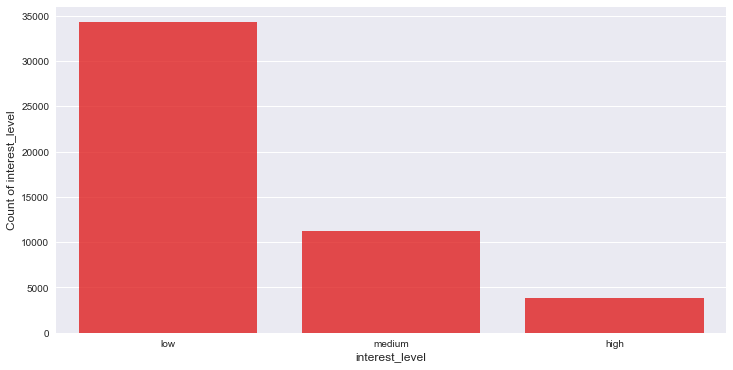

In [25]:
bar_plots(test['interest_level'])

<h3>This shows us that there are far more apartments with a 'low' interest level</h3>

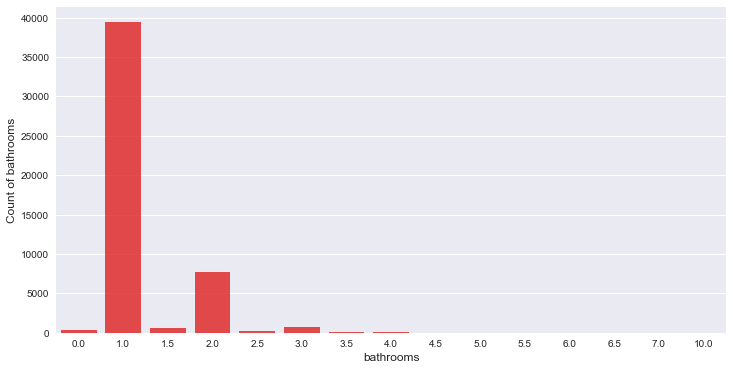

In [26]:
bar_plots(test['bathrooms'])

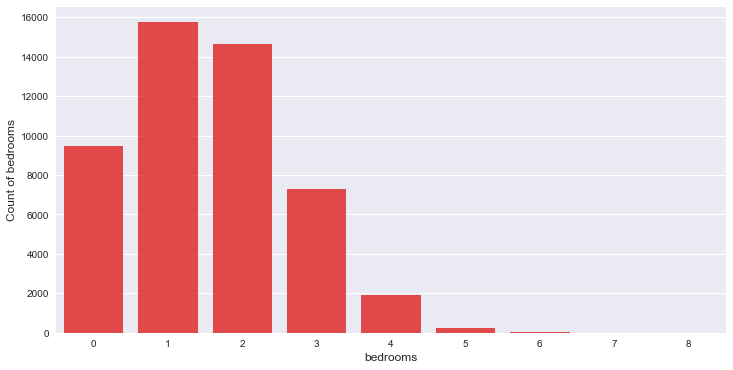

In [27]:
bar_plots(test['bedrooms'])

<h3>This shows us that there are a surprising amount of apartments listed with either zero bathrooms or zero bedrooms<br><br>I hope zero bedrooms means a studio, but no bathrooms? That sounds like a nightmare in NYC.</h3>

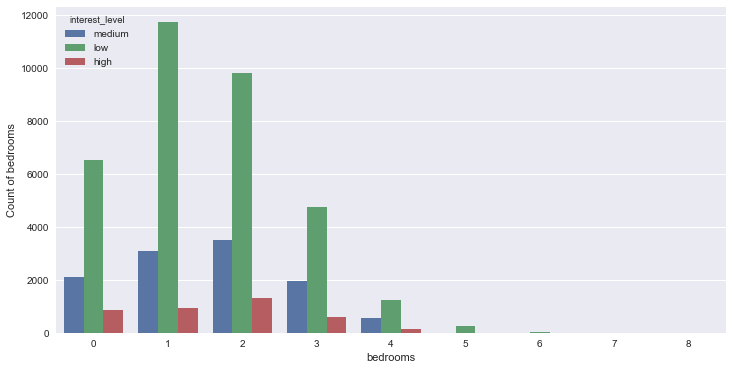

In [32]:
count_plot(test, 'bedrooms', 'interest_level')

<h3>Looks like interest level for apartments with zero bedrooms was still pretty high</h3>

<h2>Features seems to be one of the most important and complex variables to tackle so let's look at a wordcloud:<h2>

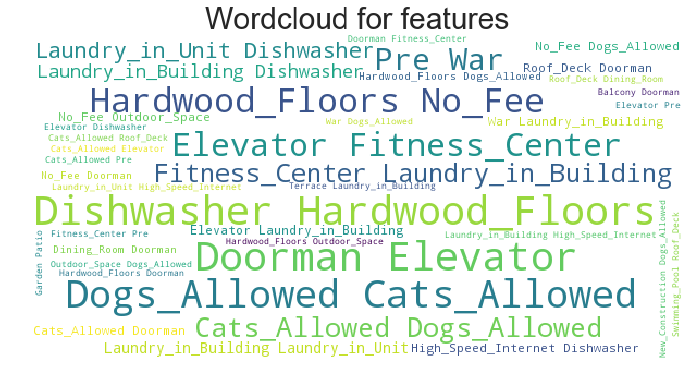

In [35]:
from wordcloud import WordCloud

text = ''
text_da = ''
for ind, row in test.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
text = text.strip()
text_da = text_da.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()